In [1]:
CUDA_INDEX = 4
NAME = 'GED_IMDBMulti'
CLASSES = 1

In [2]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
# torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

/home/nyati_pranav26/Pranav/gnn-x-experiments/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'neuro.viz' from '/home/nyati_pranav26/Pranav/gnn-x-experiments/GREED/greed/nbs_pred/../neuro/viz.py'>

In [4]:
model = models.NormGEDModel(8, CLASSES, 64, 64)
model.load_state_dict(torch.load(f'../runlogs/{NAME}/1621926070.5699093/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [5]:
norm_model = models.NormGEDModel(8, CLASSES, 64, 64)
norm_model.load_state_dict(torch.load(f'../runlogs/{NAME}-Norm/1621926797.090459/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [6]:
nn_model = models.NeuralSiameseModel(8, CLASSES, 64, 64)
nn_model.load_state_dict(torch.load(f'../runlogs/{NAME}-NN/1622014677.6683908/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [7]:
dual_model = models.DualNormSEDModel(8, CLASSES, 64, 64)
dual_model.load_state_dict(torch.load(f'../runlogs/{NAME}-Dual/1622014728.8304212/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [8]:
# gat_model = models.NormGEDModel(8, CLASSES, 64, 64, conv='gat')
# gat_model.load_state_dict(torch.load(f'../runlogs/{NAME}-ConvGAT/1628279232.559468/best_model.pt', map_location='cpu'))

In [9]:
# gcn_model = models.NormGEDModel(8, CLASSES, 64, 64, conv='gcn')
# gcn_model.load_state_dict(torch.load(f'../runlogs/{NAME}-ConvGCN/1628279090.0367167/best_model.pt', map_location='cpu'))

In [10]:
# sage_model = models.NormGEDModel(8, CLASSES, 64, 64, conv='sage')
# sage_model.load_state_dict(torch.load(f'../runlogs/{NAME}-ConvSAGE/1628279216.9677184/best_model.pt', map_location='cpu'))

In [11]:
# pmean_model = models.NormSEDModel(8, CLASSES, 64, 64, pool='mean')
# pmean_model.load_state_dict(torch.load(f'../runlogs/{NAME}-PoolMean/1628320342.6272085/best_model.pt', map_location='cpu'))

In [12]:
# pmax_model = models.NormSEDModel(8, CLASSES, 64, 64, pool='max')
# pmax_model.load_state_dict(torch.load(f'../runlogs/{NAME}-PoolMax/1628320321.3781502/best_model.pt', map_location='cpu'))

In [13]:
# psort_model = models.NormSEDModel(8, CLASSES, 64, 64, pool='sort')
# psort_model.load_state_dict(torch.load(f'../runlogs/{NAME}-PoolSort/1628320368.9409587/best_model.pt', map_location='cpu'))

In [14]:
# patt_model = models.NormSEDModel(8, CLASSES, 64, 64, pool='att')
# patt_model.load_state_dict(torch.load(f'../runlogs/{NAME}-PoolAtt/1628320098.1231208/best_model.pt', map_location='cpu'))

In [15]:
inner_test_set, _ = torch.load(f'../data/{NAME}/inner_test.pt', map_location='cpu')
inner_queries, inner_targets, _, _ = inner_test_set

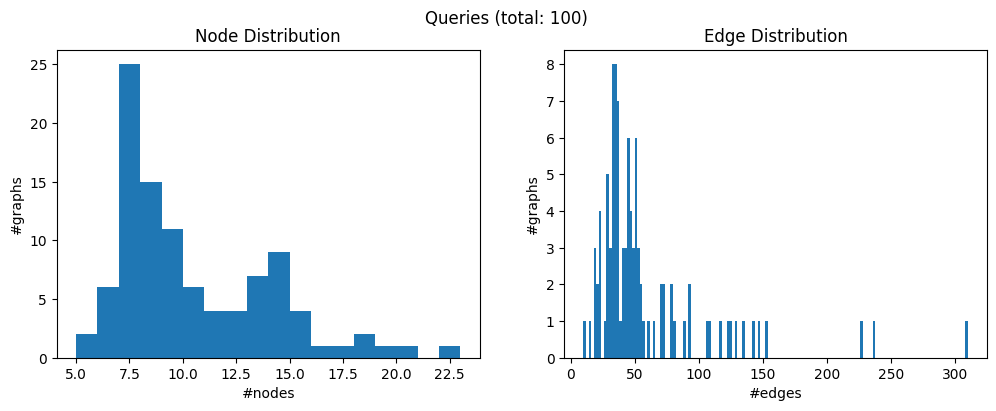

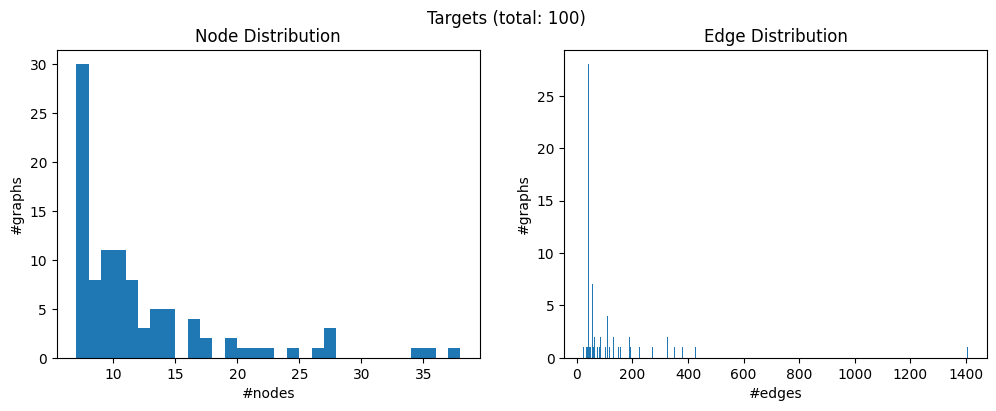

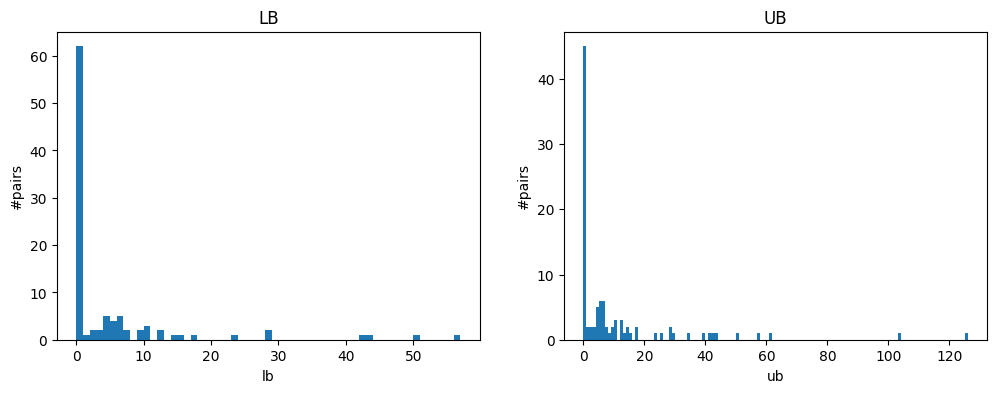

In [16]:
viz.plot_dataset_dist(inner_test_set)

In [17]:
config.n_workers = 1
tic = time.time()
inner_pred = model.predict_inner(inner_queries, inner_targets, batch_size=4096)
toc = time.time()
torch.save(inner_pred, f'../preds/{NAME}/inner_pred.pt')
print(f'NeuroGSim prediction time: {toc-tic:.3f}s')

direct predict inner dataset
NeuroGSim prediction time: 5.115s


In [19]:
tic = time.time()
norm_inner_pred = norm_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
toc = time.time()
torch.save(norm_inner_pred, f'../preds/{NAME}/norm_inner_pred.pt')
print(f'NeuroGSim-Norm prediction time: {toc-tic:.3f}s')

direct predict inner dataset
NeuroGSim-Norm prediction time: 0.011s


In [20]:
tic = time.time()
nn_inner_pred = nn_model.predict_inner(inner_queries, inner_targets)
toc = time.time()
torch.save(nn_inner_pred, f'../preds/{NAME}/nn_inner_pred.pt')
print(f'NeuroGSim-NN prediction time: {toc-tic:.3f}s')

direct predict inner dataset
NeuroGSim-NN prediction time: 0.012s


In [21]:
tic = time.time()
dual_inner_pred = dual_model.predict_inner(inner_queries, inner_targets)
toc = time.time()
torch.save(dual_inner_pred, f'../preds/{NAME}/dual_inner_pred.pt')
print(f'NeuroGSim-Dual prediction time: {toc-tic:.3f}s')

direct predict inner dataset
NeuroGSim-Dual prediction time: 0.013s


In [22]:
# tic = time.time()
# gat_inner_pred = gat_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
# toc = time.time()
# torch.save(gat_inner_pred, f'../preds/{NAME}/gat_inner_pred.pt')
# print(f'NeuroSED-GAT prediction time: {toc-tic:.3f}s')

In [23]:
# tic = time.time()
# gcn_inner_pred = gcn_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
# toc = time.time()
# torch.save(gcn_inner_pred, f'../preds/{NAME}/gcn_inner_pred.pt')
# print(f'NeuroSED-GCN prediction time: {toc-tic:.3f}s')

In [24]:
# tic = time.time()
# pmean_inner_pred = pmean_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
# toc = time.time()
# torch.save(pmean_inner_pred, f'../preds/{NAME}/pmean_inner_pred.pt')
# print(f'NeuroSED-PoolMean prediction time: {toc-tic:.3f}s')

In [25]:
# tic = time.time()
# pmax_inner_pred = pmax_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
# toc = time.time()
# torch.save(pmax_inner_pred, f'../preds/{NAME}/pmax_inner_pred.pt')
# print(f'NeuroSED-PoolMax prediction time: {toc-tic:.3f}s')

In [26]:
# tic = time.time()
# psort_inner_pred = psort_model.predict_inner(inner_queries, inner_targets, batch_size=1024)
# toc = time.time()
# torch.save(psort_inner_pred, f'../preds/{NAME}/psort_inner_pred.pt')
# print(f'NeuroSED-PoolSort prediction time: {toc-tic:.3f}s')

In [27]:
# tic = time.time()
# patt_inner_pred = patt_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
# toc = time.time()
# torch.save(patt_inner_pred, f'../preds/{NAME}/patt_inner_pred.pt')
# print(f'NeuroSED-PoolAtt prediction time: {toc-tic:.3f}s')

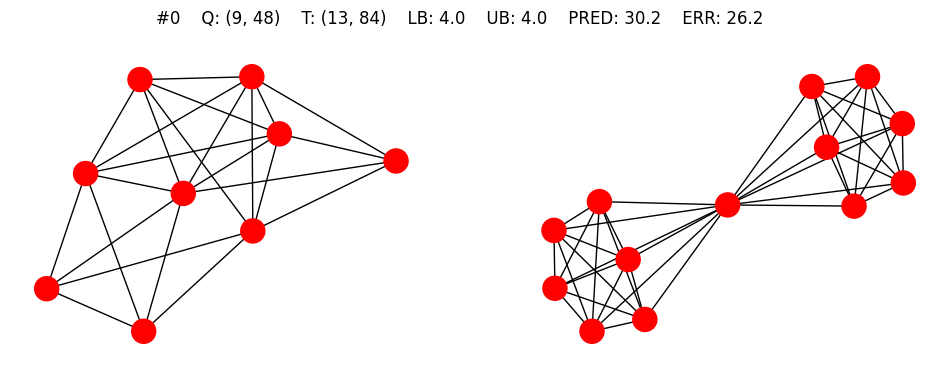

---

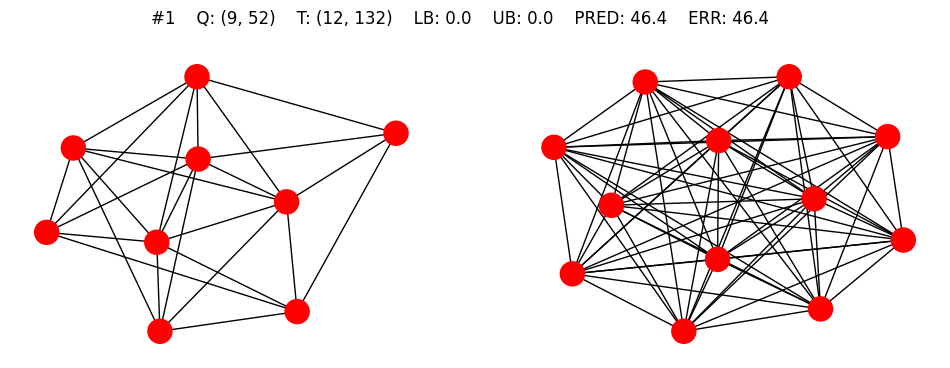

---

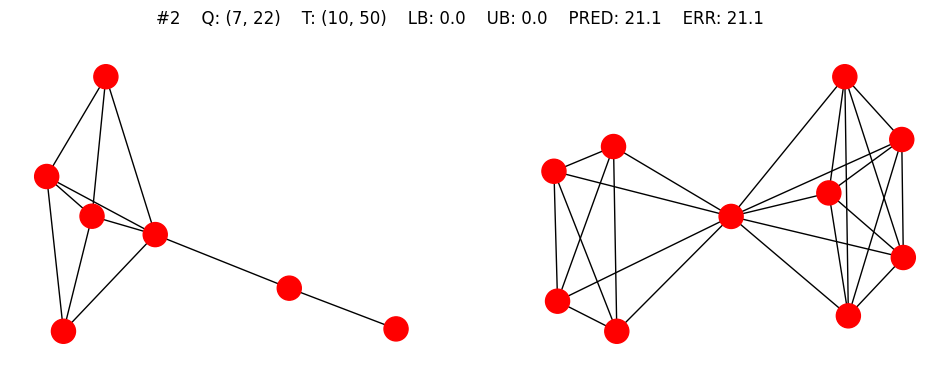

---

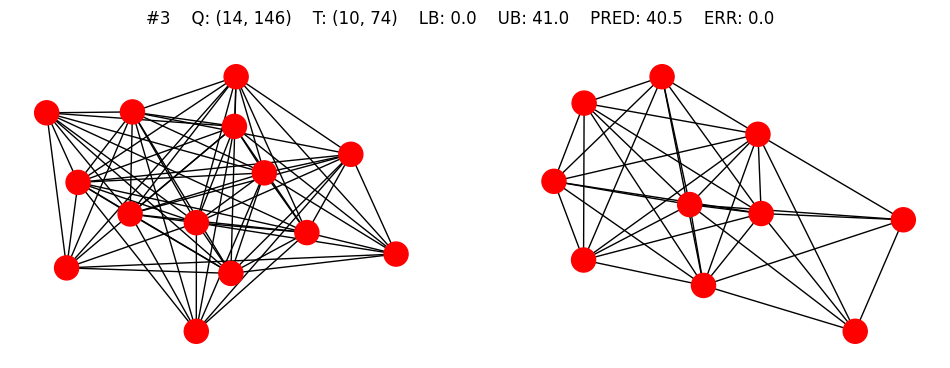

---

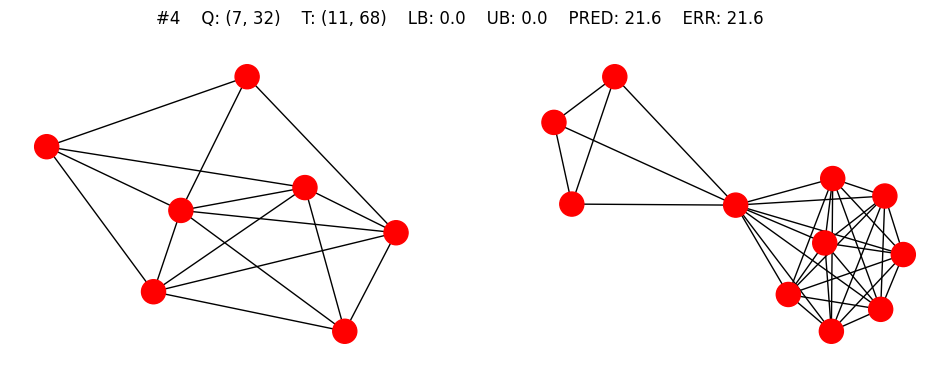

---

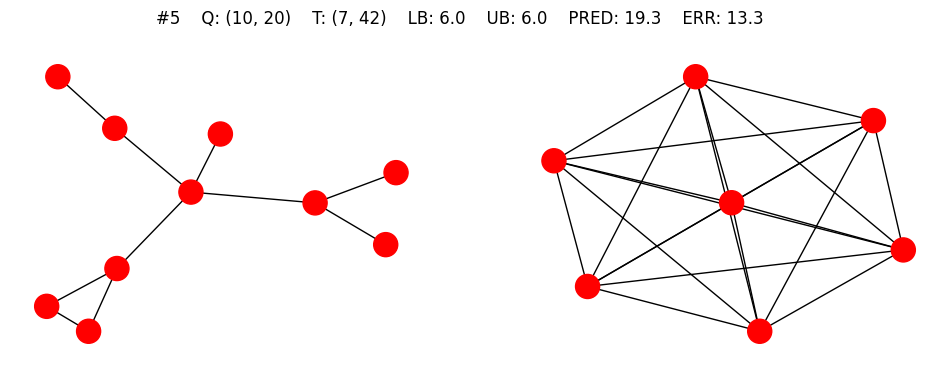

---

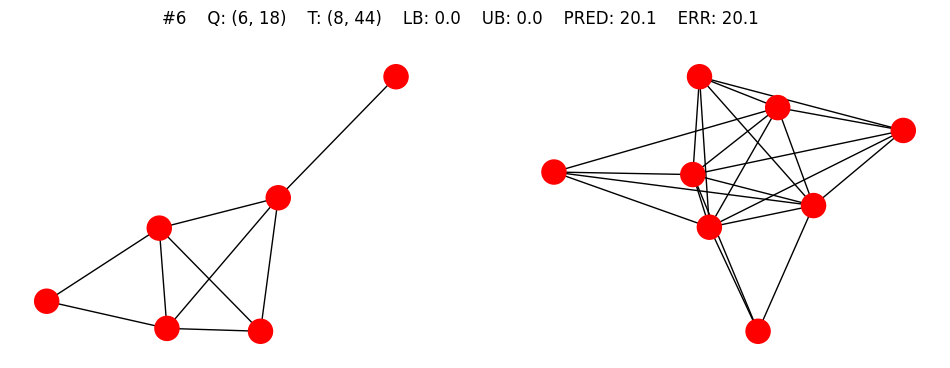

---

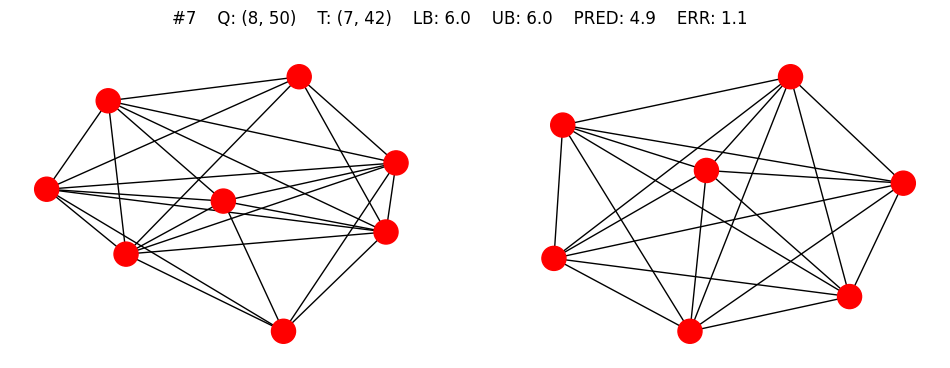

---

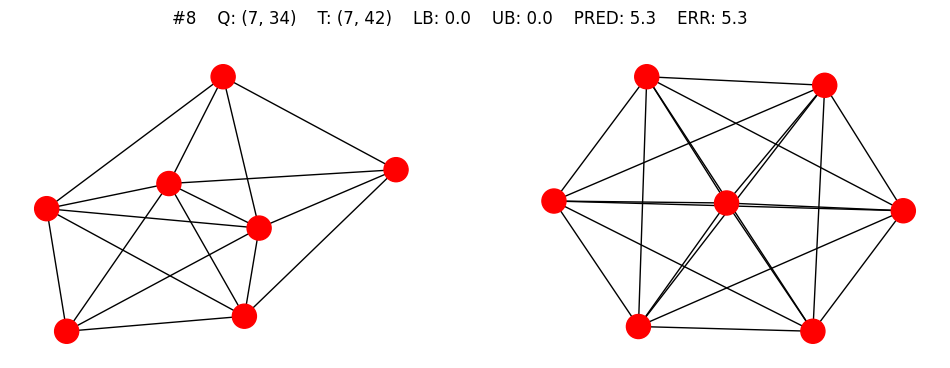

---

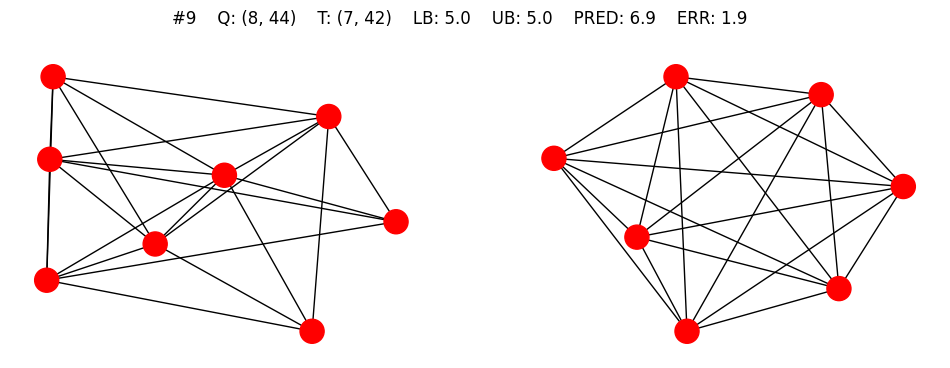

---

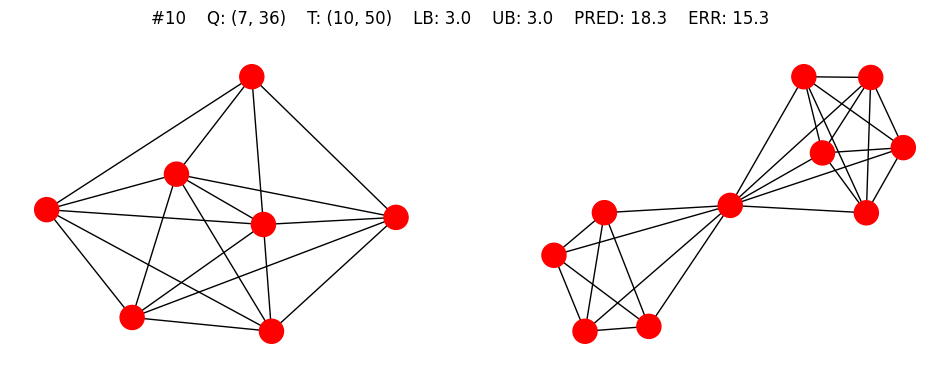

---

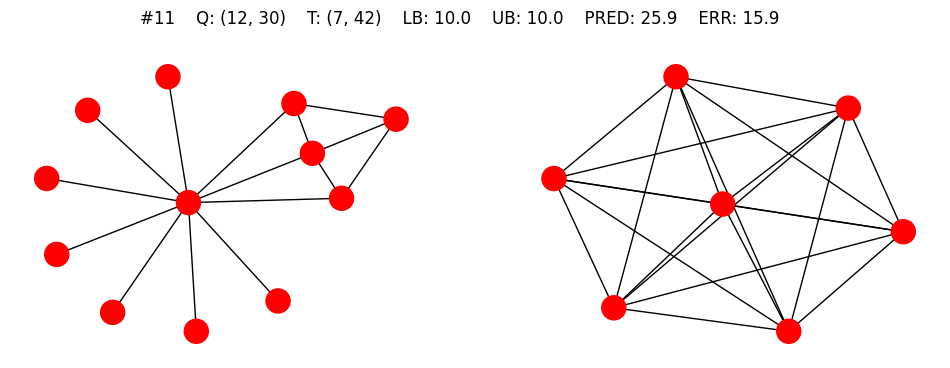

---

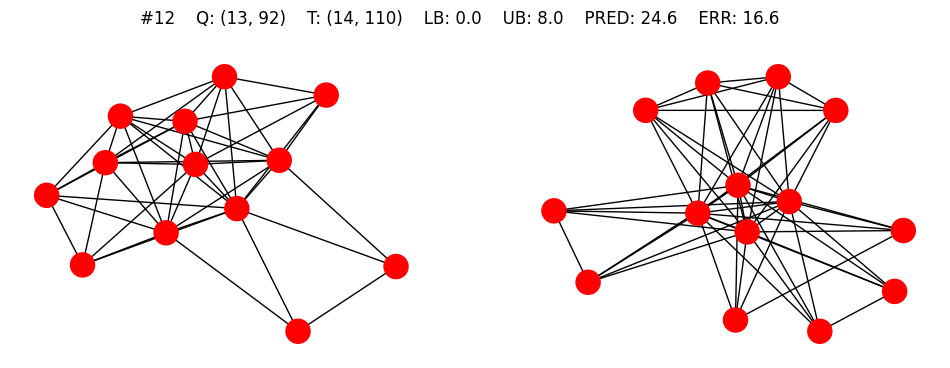

---

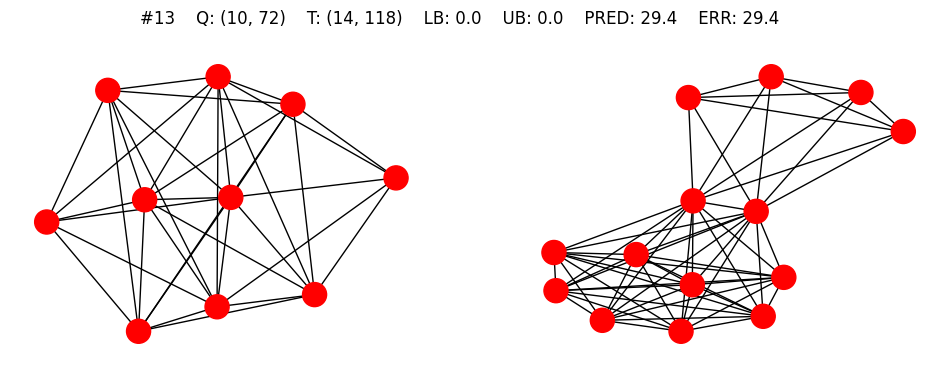

---

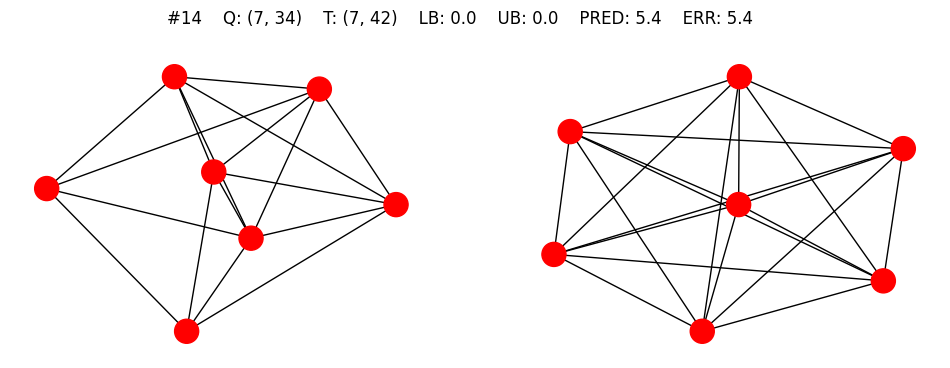

---

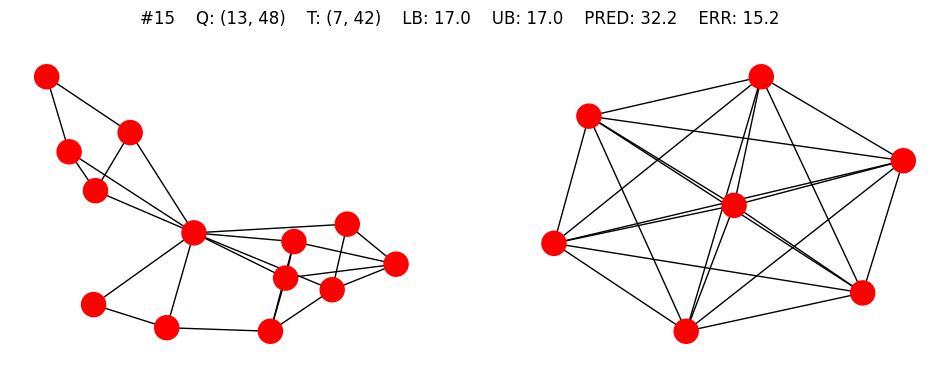

---

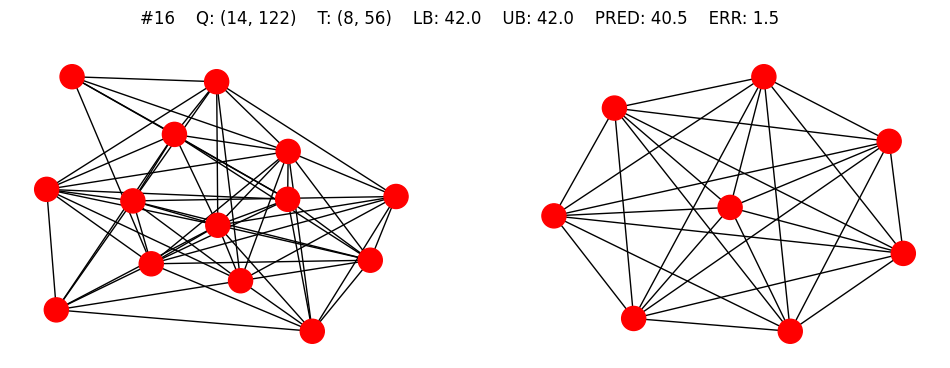

---

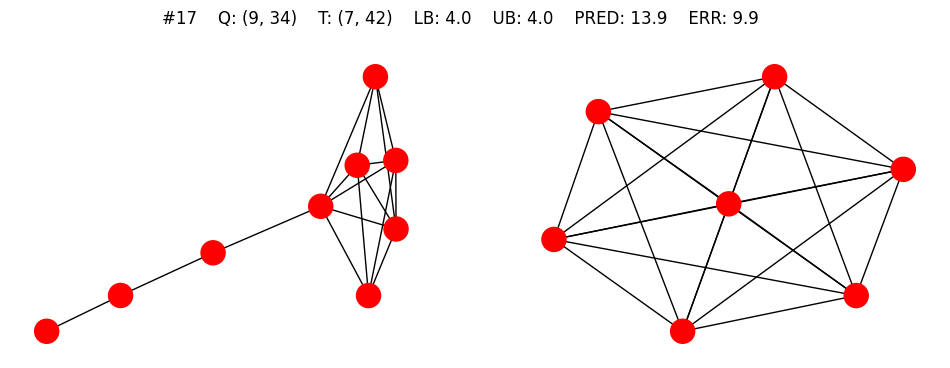

---

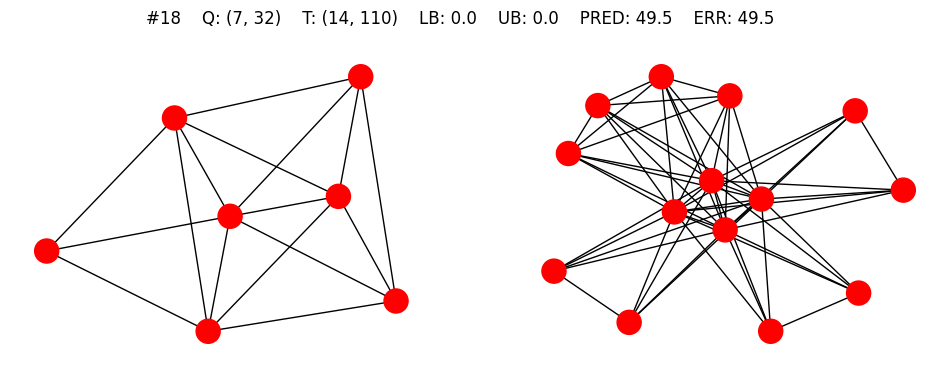

---

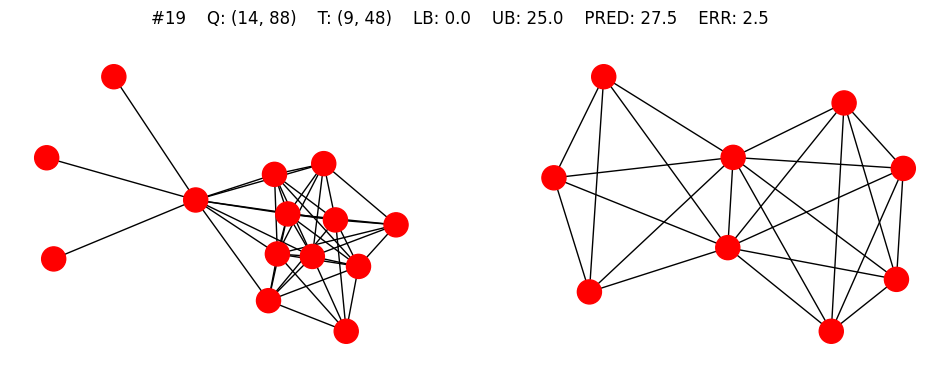

---

In [40]:
viz.plot_inner_dataset(inner_test_set, inner_pred, n_items=20)

In [29]:
config.n_workers = 1
config.method_name = ['ged_branch']
config.method_args = ['']
tic = time.time()
b_inner_lb, b_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
b_inner_pred = (b_inner_lb+b_inner_ub)/2
toc = time.time()
torch.save(b_inner_pred, f'../preds/{NAME}/b_inner_pred.pt')
print(f'Branch prediction time: {toc-tic:.3f} s ')

compute inner sed (bounds only)
n_workers: 1
method_name: ['ged_branch']
method_args: ['']


pairs: 100%|██████████| 100/100 [00:00<00:00, 272.24it/s]

Branch prediction time: 0.373 s 


In [30]:
config.n_workers = 1
config.method_name = ['ged_f2']
config.method_args = ['--time-limit 0.1']
tic = time.time()
f2_inner_lb, f2_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
f2_inner_pred = (f2_inner_lb+f2_inner_ub)/2
toc = time.time()
# torch.save(f2_inner_pred, f'../preds/{NAME}/f2_inner_pred.pt')
print(f'F2 prediction time: {toc-tic:.3f} s ')

compute inner sed (bounds only)
n_workers: 1
method_name: ['ged_f2']
method_args: ['--time-limit 0.1']


pairs:   1%|          | 1/100 [00:00<00:15,  6.32it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   4%|▍         | 4/100 [00:00<00:06, 14.16it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   8%|▊         | 8/100 [00:00<00:04, 22.40it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  11%|█         | 11/100 [00:00<00:04, 18.23it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  17%|█▋        | 17/100 [00:01<00:05, 14.53it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  20%|██        | 20/100 [00:01<00:05, 15.33it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  24%|██▍       | 24/100 [00:01<00:04, 18.47it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  29%|██▉       | 29/100 [00:01<00:05, 13.82it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  35%|███▌      | 35/100 [00:02<00:04, 15.53it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  37%|███▋      | 37/100 [00:02<00:04, 13.46it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  41%|████      | 41/100 [00:02<00:04, 13.15it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  45%|████▌     | 45/100 [00:03<00:05, 10.70it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  51%|█████     | 51/100 [00:03<00:03, 12.90it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  57%|█████▋    | 57/100 [00:04<00:03, 13.47it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  60%|██████    | 60/100 [00:04<00:02, 14.63it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  62%|██████▏   | 62/100 [00:04<00:02, 12.85it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  65%|██████▌   | 65/100 [00:04<00:02, 13.42it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  72%|███████▏  | 72/100 [00:05<00:01, 15.50it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  77%|███████▋  | 77/100 [00:05<00:01, 19.35it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  80%|████████  | 80/100 [00:05<00:01, 18.59it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  82%|████████▏ | 82/100 [00:05<00:01, 15.44it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  88%|████████▊ | 88/100 [00:06<00:00, 15.35it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  90%|█████████ | 90/100 [00:06<00:00, 12.03it/s]

Academic license - for non-commercial use only - expires 2025-03-12


pairs:  95%|█████████▌| 95/100 [00:06<00:00, 11.35it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs: 100%|██████████| 100/100 [00:07<00:00, 13.82it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
F2 prediction time: 7.243 s 


In [31]:
outer_test_set = torch.load(f'../data/{NAME}/outer_test.pt', map_location='cpu')
outer_queries, outer_targets, _, _ = outer_test_set

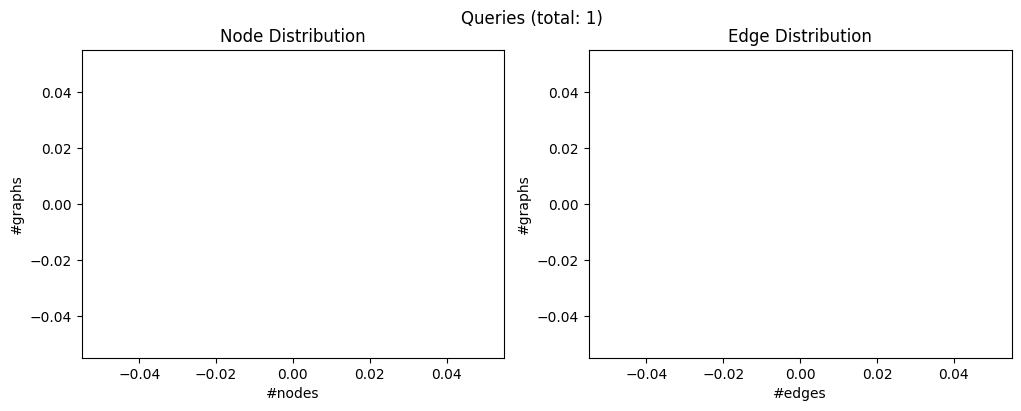

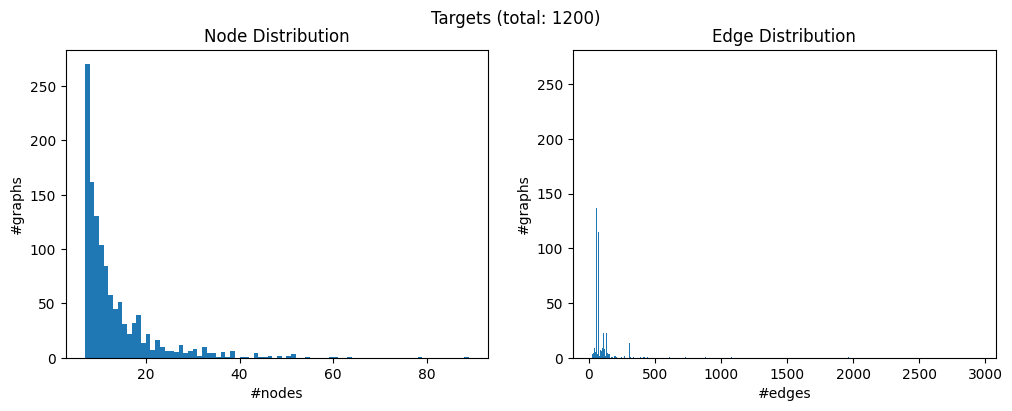

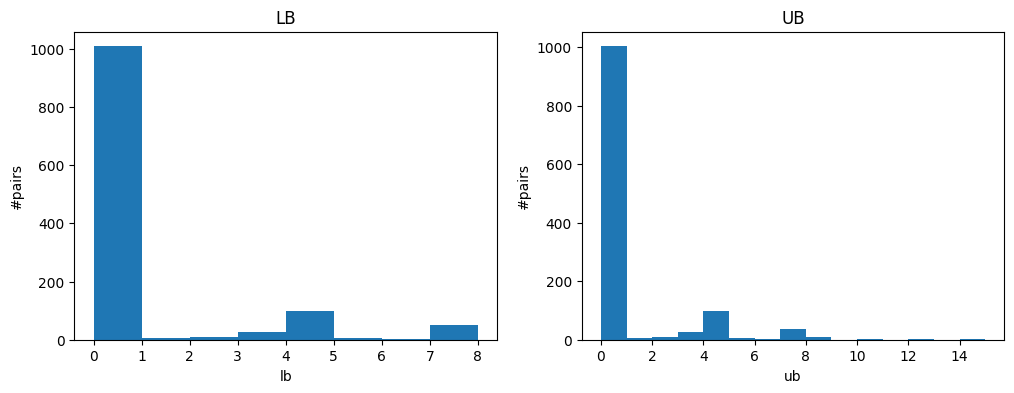

In [32]:
viz.plot_dataset_dist(outer_test_set)

In [33]:
tic = time.time()
outer_pred = model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(outer_pred, f'../preds/{NAME}/outer_pred.pt')
print(f'NeuroGSim prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim prediction time: 0.049 s


In [34]:
tic = time.time()
norm_outer_pred = norm_model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(norm_outer_pred, f'../preds/{NAME}/norm_outer_pred.pt')
print(f'NeuroGSim-Norm prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim-Norm prediction time: 0.052 s


In [36]:
tic = time.time()
nn_outer_pred = nn_model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(nn_outer_pred, f'../preds/{NAME}/nn_outer_pred.pt')
print(f'NeuroGSim-NN prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim-NN prediction time: 0.042 s


In [37]:
tic = time.time()
dual_outer_pred = dual_model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(dual_outer_pred, f'../preds/{NAME}/dual_outer_pred.pt')
print(f'NeuroGSim-Dual prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim-Dual prediction time: 0.041 s


In [38]:
torch.save(b_inner_pred.view(len(outer_queries), len(outer_targets)), f'../preds/{NAME}/b_outer_pred.pt')

RuntimeError: shape '[1, 1200]' is invalid for input of size 100

In [39]:
torch.save(f2_inner_pred.view(len(outer_queries), len(outer_targets)), f'../preds/{NAME}/f2_outer_pred.pt')

RuntimeError: shape '[1, 1200]' is invalid for input of size 100

In [ ]:
# config.n_workers = 64
# config.method_name = ['ged_branch']
# config.method_args = ['']
# tic = time.time()
# b_outer_lb, b_outer_ub = datasets.outer_sed(outer_queries, outer_targets)
# b_outer_pred = (b_outer_lb + b_outer_ub)/2
# toc = time.time()
# torch.save(b_outer_pred, f'../preds/{NAME}/b_outer_pred.pt')
# print(f'Branch prediction time: {toc-tic:.3f} s')

In [ ]:
# config.n_workers = 64
# config.method_name = ['ged_f2']
# config.method_args = ['--time-limit 0.1']
# tic = time.time()
# f2_outer_lb, f2_outer_ub = datasets.outer_sed(outer_queries, outer_targets)
# f2_outer_pred = (f2_outer_lb + f2_outer_ub)/2
# toc = time.time()
# torch.save(f2_outer_pred, f'../preds/{NAME}/f2_outer_pred.pt')
# print(f'F2 prediction time: {toc-tic:.3f} s')